In [496]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline 
    # Говорим jupyter'у, чтобы весь графический вывод был в браузере, а не в отдельном окне
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения

# 0. Описание задачи

Таблица содержит данные о 768 людях (объектах). Для каждого человека указаны следующие данные:
1. Беременность (ед.)
2. Уровень глюкозы (ед.)
3. Кровяное давление (мм. рт. ст.)
4. Толщина кожи (мм)
5. Уровень инсулина (ММЕ / мл)
6. Индекс массы тела (кг / м^2)
7. Вероятность диабета на основе анамнеза (ед.)
8. Возраст (лет)
9. Результат (0 - отрицательный, 1 - положительный)

Задача состоит в том, чтобы по первым 8 признакам предсказать, болен ли человек.

# 1. Считывание данных

In [497]:
url = "https://raw.githubusercontent.com/381706LembrikovStepan/MachineLearning/main/diabetes.csv"
data_raw = pd.read_csv(url)

Выведем начало и конец таблицы на экран для наглядности

In [498]:
data_raw

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# 2. Визуализация данных и вычисление основных характеристик

Сначала посмотрим, сколько всего людей из выборки имеют положительный и отрицательный диагнозы.

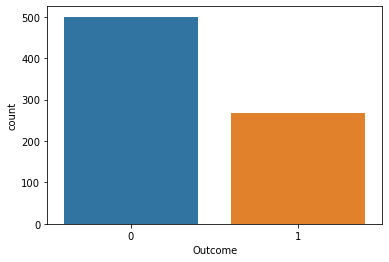

In [499]:
sns.countplot(x='Outcome', data=data_raw)
pass

Из графика видно, что в выборке 500 человек не больны диабетом. Остальные 268 имеют положительный диагноз.

Посмотрим, как зависит соотношение здоровых и больных людей в зависимости от количества беременностей

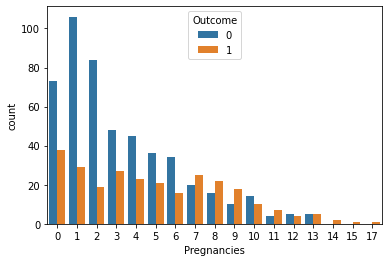

In [500]:
sns.countplot(x='Pregnancies', hue='Outcome', data=data_raw)
pass

Из графика видно, что с увеличением количества беременностей возрастает доля больных людей по отношению к здоровым. Из этого можно сделать вывод, что существует корреляция между наличием диабета и количеством беременностей.

Вычислим основные характеристики для каждого из признаков

In [501]:
data_raw.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Как видно из данной таблицы, столбцы "Glucose", "BloodPressure", "SkinThickness", "Insulin" и "BMI" имеют в качестве минимального значения ноль. Очевидно, что это пропущенные значения, которые серьёзно искажают характеристики. Для начала заменим их на NaN.

In [502]:
data = data_raw
data["Glucose"] = data["Glucose"].replace(to_replace = 0, value = np.nan)
data["BloodPressure"] = data["BloodPressure"].replace(to_replace = 0, value = np.nan)
data["SkinThickness"] = data["SkinThickness"].replace(to_replace = 0, value = np.nan)
data["Insulin"] = data["Insulin"].replace(to_replace = 0, value = np.nan)
data["BMI"] = data["BMI"].replace(to_replace = 0, value = np.nan)

Узначем, сколько всего незаполненных значений в каждом из столбцов

In [503]:
data.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Найдём верные характеристики, которые не учитывают пропущенные значения.

In [504]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Из первой строки таблицы можно увидеть, что в некоторых столбцах очень много пропущенных значений.
Также данные в строке максимумов позволяют сделать предположение о наличии выбросов в  столбце "SkinThickness". Построим гистограмму и удостоверимся в этом:

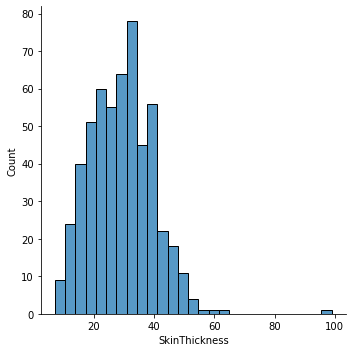

In [505]:
sns_plot = sns.displot(data["SkinThickness"])

Выброс обнаружен. Уберём его из данных:

In [506]:
rows_to_drop = data[(data['SkinThickness'] > data['SkinThickness'].quantile(0.999))].index
data = data.drop(rows_to_drop)

Построим гистограмму ещё раз, получилось ли избавиться от выброса

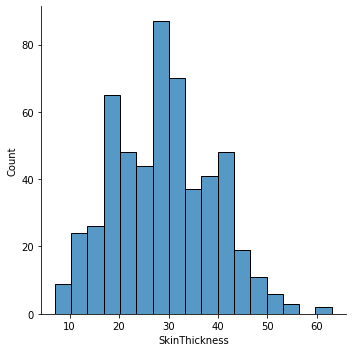

In [507]:
sns_plot = sns.displot(data["SkinThickness"])

Выбросов в данных по данному признаку не обнаружено. 

Теперь построим корреляционную матрицу:

In [508]:
data.shape
corr_mat = data.corr()
corr_mat

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.130461,0.214082,0.110540,0.082171,0.021960,-0.033309,0.548341,0.223189
Glucose,0.130461,1.000000,0.224792,0.207306,0.581186,0.232662,0.136801,0.261293,0.492799
BloodPressure,0.214082,0.224792,1.000000,0.238360,0.098272,0.289344,-0.002726,0.332091,0.171184
SkinThickness,0.110540,0.207306,0.238360,1.000000,0.184888,0.673379,0.117465,0.138600,0.253102
Insulin,0.082171,0.581186,0.098272,0.184888,1.000000,0.228050,0.130395,0.220261,0.303454
BMI,0.021960,0.232662,0.289344,0.673379,0.228050,1.000000,0.155269,0.024890,0.313503
DiabetesPedigreeFunction,-0.033309,0.136801,-0.002726,0.117465,0.130395,0.155269,1.000000,0.032698,0.173512
Age,0.548341,0.261293,0.332091,0.138600,0.220261,0.024890,0.032698,1.000000,0.235203
Outcome,0.223189,0.492799,0.171184,0.253102,0.303454,0.313503,0.173512,0.235203,1.000000


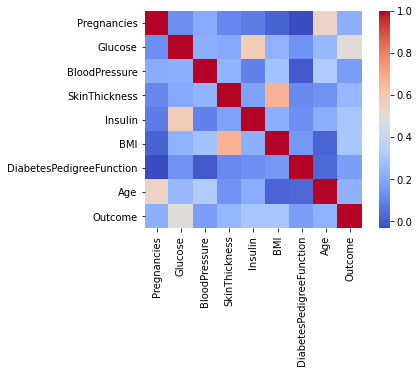

In [509]:
sns.heatmap(corr_mat, square=True, cmap='coolwarm')
pass

Выведем таблицу, которая даст нам понять, какие коэффициенты корееляции больше значения 0.5:

In [510]:
corr_mat > 0.5

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,True,False,False,False,False,False,False,True,False
Glucose,False,True,False,False,True,False,False,False,False
BloodPressure,False,False,True,False,False,False,False,False,False
SkinThickness,False,False,False,True,False,True,False,False,False
Insulin,False,True,False,False,True,False,False,False,False
BMI,False,False,False,True,False,True,False,False,False
DiabetesPedigreeFunction,False,False,False,False,False,False,True,False,False
Age,True,False,False,False,False,False,False,True,False
Outcome,False,False,False,False,False,False,False,False,True


In [511]:
corr_mat.where(np.triu(corr_mat > 0.5, k=1)).stack().sort_values(ascending=False)

SkinThickness  BMI        0.673379
Glucose        Insulin    0.581186
Pregnancies    Age        0.548341
dtype: float64

Мы получили довольно очевидные зависимости (средняя корреляция). Логично, что бОльший индекс массы тела (ИМТ) говорит о бОльшем весе человека, что коррелирует с толщиной его кожи. Во второй строке видна зависимость уровеня глюкозы и инсулина, что тоже не удивительно. И наконец, возраст человека напрямую коррелирует с количеством беременностей, что тоже бесспорно. Несмотря на то, что рассматриваются оба пола, данная зависимость прослеживается.

Тем не менее, нам не удолось выделить зависимости ни одного из признаков с наличием самого диагноза. Попробуем рассмотреть конкретно столбец зависимостей наличия диагноза от других признаков:

In [512]:
data.shape
corr_mat = data.corr()
corr_mat["Outcome"].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.492799
BMI                         0.313503
Insulin                     0.303454
SkinThickness               0.253102
Age                         0.235203
Pregnancies                 0.223189
DiabetesPedigreeFunction    0.173512
BloodPressure               0.171184
Name: Outcome, dtype: float64

Итак, данная таблица позволяет понять, что уровень глюкозы, ИМТ и уровень инсулина имеют наибольшее значение коэффициента корреляции с наличием диабета у человека (умеренная корреляция).

# 3. Обработка пропущенных значений

Посмотрим, сколько же незаполненных ячеек имеется в каждом из столбцов:

In [513]:
data.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     373
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Заполним пустые значения медианами соответствующих числовых признаков:

In [514]:
data.fillna(data.median(axis = 0), axis=0 , inplace=True)

In [515]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# 4. Категориальные признаки отсутствуют

# 5. Нормализация

Выполним стандартизацию всех признаков:

In [516]:
data_stand = (data - data.mean(axis = 0))/data.std(axis = 0)

In [517]:
data_stand.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,7.670000e+02,7.670000e+02,7.670000e+02,7.670000e+02,7.670000e+02,7.670000e+02,7.670000e+02,7.670000e+02,7.670000e+02
mean,-7.440087e-17,7.237438e-19,1.328794e-16,-1.494531e-16,2.526590e-16,4.202419e-15,1.825716e-15,-2.268213e-16,1.971478e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.141301e+00,-2.556625e+00,-3.997763e+00,-2.612912e+00,-1.465709e+00,-2.071798e+00,-1.187673e+00,-1.041078e+00,-7.302765e-01
25%,-8.446630e-01,-7.271214e-01,-6.931323e-01,-4.767207e-01,-2.278212e-01,-7.198937e-01,-6.884629e-01,-7.851463e-01,-7.302765e-01
50%,-2.513878e-01,-1.502507e-01,-3.220615e-02,-2.011480e-03,-1.815450e-01,-2.213658e-02,-3.038751e-01,-3.585935e-01,-7.302765e-01
75%,6.385250e-01,6.079222e-01,6.287200e-01,3.540205e-01,-1.526224e-01,6.029375e-01,4.668085e-01,6.651331e-01,1.367559e+00
max,3.901539e+00,2.552800e+00,4.098582e+00,4.033017e+00,8.159735e+00,5.036603e+00,5.876676e+00,4.077555e+00,1.367559e+00


# 6. Разбиение данных

Для предсказания цены наличия диабета будем использовать все входные признаки.

In [518]:
X = data_stand.drop(["Outcome"], axis=1)
y = data["Outcome"]

Разобьем данные на обучающую и тестовую выборки в пропорции 3:1 (75% - обучающая выборка, 25% - тестовая):

In [519]:
N_test = 575
N_train = X.shape[0] - N_test

In [520]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size = N_train, test_size = N_test, 
                                                    stratify = y, random_state = 42)

In [521]:
X_train.shape, X_test.shape

((192, 8), (575, 8))

In [522]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
#knn.set_params(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [523]:
knn

KNeighborsClassifier(n_neighbors=10)

In [524]:
y_test_predict = knn.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict)

In [525]:
err_test

0.23304347826086957

In [526]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[325  50]
 [ 84 116]]


In [527]:
confusion_matrix([0,1,0,1,0], [0,1,0,0,0])

array([[3, 0],
       [1, 1]], dtype=int64)

In [528]:
# Долго!
from sklearn.model_selection import GridSearchCV
nnb = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,19, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.22342105263157896 11


In [529]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=best_n_neighbors, p=1)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11, p=1)

In [530]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [531]:
y_train.shape

(192,)

In [532]:
y_train != y_train_pred

16      True
631    False
732    False
289    False
101    False
       ...  
468     True
113    False
556    False
210    False
107    False
Name: Outcome, Length: 192, dtype: bool

In [533]:
y_test != y_test_pred

609    False
31     False
139    False
681    False
488    False
       ...  
637    False
656    False
322     True
12      True
23     False
Name: Outcome, Length: 575, dtype: bool

In [534]:
np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

(0.21875, 0.2417391304347826)

In [535]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.78125, 0.7582608695652174)

In [536]:
1 - model.score(X_test, y_test)

0.24173913043478257

In [537]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_pred)

array([[315,  60],
       [ 79, 121]], dtype=int64)

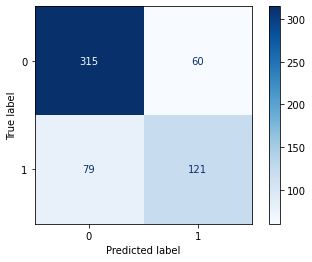

In [538]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)
pass